
<h1 align=center style="line-height:200%;font-family:vazir;color:#000000">
<font face="vazir" color="#000000">
</font>
</h1>
<h2 align=center style="line-height:200%;font-family:vazir;color:#000000">
<font face="vazir" color="#000000">
پروژه 4 درس یادگیری تقویتی
</font>
</h2>
<h2 align=right style="line-height:200%;font-family:vazir;color:#000000">
<font face="vazir" color="#000000">
  نام: سحر آقاخانی
</font>
</h2>
<h2 align=right style="line-height:200%;font-family:vazir;color:#000000">
<font face="vazir" color="#000000">
  شماره دانشجویی: -
</font>
</h2>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.table as tbl
from IPython.display import clear_output

np.random.seed(2024)

# <p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=5>
بخش 1: تعریف محیط
</font>
</p>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در این کلاس، محیط و ویژگی‌های آن تعریف شده است. با توجه به جزئیات مساله، این محیط شامل یک جدول است که نقطه شروع آن با <code>'S'</code>، نقطه پایان آن با <code>'G'</code>موانع حرکت با  <code>'X'</code> نمایش داده شده است.
</font>
</p>


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
حالت هایی که برای این محیط و عامل تعریف شده است به صورت <code>(j,i)</code>است. این حالت ها به ترتیب  مختصات عمودی و افقی عامل در صفحه هستند.
 در تعریف و initialization این محیط این قابلیت قرار داده شده است که محیط با ابعاد، تعداد موانع و موقعیت موانع متفاوت از صورت سوال تعریف شود هرچند حالت پیش فرض آن مانند صورت سوال است. برای این محیط، چندین تابع تعریف شده است. این توابع به شرح زیر هستند:
</font>
</p>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
<code>is_out(state)</code>:
این تابع برای هر استیت ورودی چک میکند که آیا مختصات آن استیت خارج از محیط ماز است یا خیر.
</font>
</p>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
<code>is_goal(state)</code>:
این تابع با گرفتن یک استیت مشخص می کند که آیا آن استیت خانه هدف است یا خیر.
</font>
</p>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
<code>is_obstacle(state)</code>:
این تابع با گرفتن یک استیت مشخص می کند که آیا در آن استیت مانعی وجود دارد یه نه یا خیر.
</font>
</p>


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
<code>get_next_state(state, action)</code>:
 این تابع با گرفتن استیت ورودی <code>(j,i)</code> و یک عمل<code>['up', 'down', 'left' 'right']</code> استیت بعدی و پاداش ناشی از آن را خروجی می دهد. این تابع ابتدا استیت جدید به دست آمده را محاسبه کرده و در صورتی که استیت جدید خارج از صفحه بازی باشد یا مانع باشد، استیت جدید را در همان نقطه قبلی نگه میدارد و پاداش -1 به عامل می دهد. اگر استیت بعدی نقطه هدف باشد، پاداش +1 به عامل داده می شود. در صورتی که قدم بعدی هیچ یک از موارد فوق نباشد، عامل پاداش 0 گرفته و به مسیر خود ادامه می دهد.
</font>
</p>

In [ ]:
class Maze():
  def __init__(self, num_rows = 6, num_columns = 9, num_obstacles = 7, obstacle_placement = 'default'):
    self.grid= np.full((num_rows, num_columns), '.')
    self.num_rows = num_rows
    self.num_columns = num_columns
    default_obstacles = [(0,7), (1,7),(2,7),(4,5),(1,2),(2,2),(3,2)]
    if obstacle_placement == 'default':
      self.obstacles = default_obstacles
    elif obstacle_placement == 'random':
      self.obstacles = list({(np.random.randint(0,num_rows),np.random.randint(0,num_columns)) for _ in range(num_obstacles*2)})[:num_obstacles]
    else:
      raise ValueError('obstacle_placement can only be "default" or "random".')
    for (j,i) in self.obstacles:
      self.grid[j,i] = 'X'
    self.grid[0,num_columns-1] = 'G'
    self.grid[2,0] = 'S'
    self.start_state = (2,0)

  def is_out(self,state):
    j,i = state
    if ((j<0) or( j>=self.num_rows) or (i< 0) or (i>=self.num_columns)):
      return 1
    else:
      return 0

  def is_goal(self,state):
    j,i = state
    if self.grid[j,i] == 'G':
      return 1
    return 0

  def is_obstacle(self,state):
    j,i = state
    if self.grid[j,i] == 'X':
      return 1
    return 0


  def get_next_state(self,state, action):
        j,i= state
        reward = 0
        if action == 'up':
            next_state = (j - 1, i)
        elif action == 'down':
            next_state = (j + 1, i)
        elif action == 'left':
            next_state = (j, i - 1)
        elif action == 'right':
            next_state = (j,i + 1)
        else:
            raise ValueError("Invalid action. Must be 'up', 'down', 'left', or 'right'.")

        if self.is_out(next_state):
            next_state = state
            reward = -1
        elif self.is_obstacle(next_state):
            next_state = state
            reward = -1

        elif self.is_goal(next_state):
          reward = 1

        return next_state, reward






# <p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=5>
TD بخش 2: یافتن تابع ارزش به روش
</font>
</p>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در این کلاس، عاملی با سیاست <code>random walk</code> و همچنین پارامتر های مورد نیاز برای تخمین تابع ارزش حالت آن تعریف شده اند.پارامتر های عامل عبارتند از:
</font>
</p>
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
<code>Maze</code>: این پارامتر یک کپی از کلاس Maze است که محیط و متدهای آن را برای عامل تعریف میکند.
</font>
</p>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
<code>grid</code>: این پارامتر یک کپی از جدول بازی (Maze.grid) دارد.
</font>
</p>
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
<code>actions</code>: این پارامتر یک لیست از تمام اکشن های قابل انجام در یک گام زمانی است:<code>['up', 'down', 'left', 'right']</code>
</font>
</p>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
<code>Value_function</code>:این متغیر برای ذخیره سازی تابع ارزش حالت تعریف شده است.
</font>
</p>


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
<code>prev_Value_function</code>:این متغیر نیز برای دخیره سازی تابع ارزش در iteration قبلی تعریف شده است تا بتوان به وسیله مقایسه آن با تابع ارزش در قدم فلی، تخمین زد که آیا تابع ارزش همگرا شده است یا نه
</font>
</p>


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
علاوه بر متغیر های معرفی شده، برای پیاده سازی الگوریتم TD، توابع زیر تعریف شده اند:
</font>
</p>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
<code>TD_value_function()</code>:
این تابع در حقیقت تابع ارزش حالت عمل را در الگوریتم TD محاسبه میکند. با توجه به این که سیاست از پیش تعیین شده توسط صورت سوال سیاست random walk است، می توان از کد
<code> np.random.choice([0,1,2,3]) </code> برای انتخاب اندیس عمل استفاده می کنیم.
</font>
</p>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
<code>draw_value_function_table()</code>:
این تابع نیز برای رسم صفحه بازی و رسم تابع ارزش حالت- عمل بر روی آن تعریف شده است.
</font>
</p>



## <p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=5>
تحلیل این قسمت:
</font>
</p>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
برای اینکه همگرایی این تابع چک شود، یک حد بالا برای تابع ارزش حالت در هر دو مرحله متوالی قرار داده شده است و حداکثر 10000 مرحله این تابع iterate میکند. مسئله ای که مشاهده شده این است که این تابع با شرط <code>np.max(np.abs(self.Value_function - self.prev_Value_function)) < 0.01</code> در 10000 iteration اول همگرا نشده است. علت این امر میتواند این باشد که سیاست مورد نظر random walk است و با توجه به اینکه فرمول آپدیت شدن تابع ارزش حالت به صورت زیر است و s' با احتمال برابر میتواند هر یک از عمل ها باشد، ممکن است نیاز به تعداد خیلی بیشتر اپیزود برای همگرایی داشته باشد.


</font>
</p>

$$V(s) ← V(s) + \alpha \cdot \left( r + \gamma \cdot V(s') - V(s) \right) $$



In [ ]:
class Agent():
  def __init__(self, Maze):
    self.Maze = Maze
    self.grid = Maze.grid
    self.alpha = 0.9
    self.epsilon = 0.1
    self.discount_factor = 0.9
    self.actions = ['up', 'down', 'left', 'right']
    # self.policy = 0.25*np.ones((self.grid.shape[0],self.grid.shape[1], 4))
    self.Value_function = np.zeros_like(self.grid, dtype = float)
    self.decay_rate = 0.01
    self.prev_Value_function = self.Value_function.copy()

  def TD_value_function(self):
    iteration = 0
    max_iteration = 10000
    while(True):
      iteration += 1
      if iteration > max_iteration:
        break
      current_state = self.Maze.start_state
      self.prev_Value_function = self.Value_function.copy()
      if iteration%100 == 0:
        clear_output(wait=True)
        print(f'iteration: {iteration}')
        self.draw_value_function_table()


      while(not self.Maze.is_goal(current_state)):
        action = self.actions[np.random.choice([0,1,2,3])]
        next_state , reward = self.Maze.get_next_state(current_state , action)
        j,i = current_state
        next_j, next_i = next_state
        self.Value_function[j,i] = self.Value_function[j,i] + self.alpha * (reward + self.discount_factor *self.Value_function[next_j,next_i] - self.Value_function[j,i])
        current_state = next_state

      if np.max(np.abs(self.Value_function - self.prev_Value_function)) < 0.01:
        break

  def draw_value_function_table(self):
      fig, ax = plt.subplots(figsize=(self.grid.shape[1], self.grid.shape[0]))
      ax.axis('off')
      table = tbl.Table(ax, bbox=[0, 0, 1, 1])
      nrows, ncols = self.grid.shape
      width, height = 1 / ncols, 1 / nrows

      for j in range(nrows):
          for i in range(ncols):
              state = (j, i)
              cell_text = ""
              cell_color = "white"

              if self.Maze.is_obstacle(state):
                  cell_text = f"{self.Value_function[j, i]:.4f}"
                  cell_color = "darkred"
              elif self.grid[j, i] == "G":
                  cell_text = f"{self.Value_function[j, i]:.4f}"
                  cell_color = "lightgreen"
              elif self.grid[j, i] == "S":
                  cell_text = f"{self.Value_function[j, i]:.4f}"
                  cell_color = "pink"
              else:
                  cell_text = f"{self.Value_function[j, i]:.4f}"
                  cell_color = "white"

              table.add_cell(j, i, width, height, text=cell_text, loc="center", facecolor=cell_color)

      for j in range(nrows):
          table.add_cell(j, -1, width, height, text=j, loc="right", edgecolor="none", facecolor="none")
      for i in range(ncols):
          table.add_cell(-1, i, width, height / 2, text=i, loc="center", edgecolor="none", facecolor="none")

      ax.add_table(table)
      plt.show()




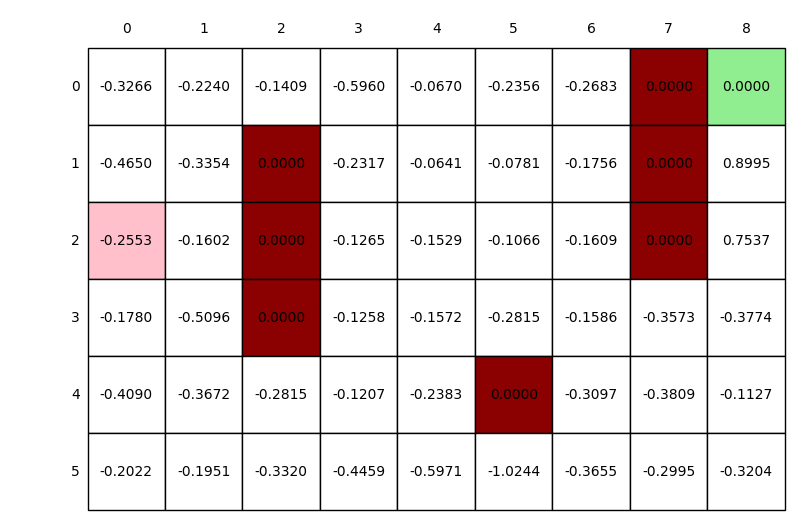

In [ ]:
np.random.seed(42)
FISH = Maze()
robot = Agent(FISH)
robot.TD_value_function()
clear_output(wait=True)
robot.draw_value_function_table()

# <p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=5>
 SARSA بخش 3: یافتن سیاست بهینه به روش
</font>
</p>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در این کلاس، یک عامل برای یافتن سیاست بهینه به روش <code>sarsa</code>  تعریف شده است. که در طی 200 اپیزود و با پارامترهای مشخص شده در صورت سوال، به عامل روش رسیدن از نقطه شروع به هدف را آموزش می دهد.
</font>
</p>
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
<code>Maze</code>: این پارامتر یک کپی از کلاس Maze است که محیط و متدهای آن را برای عامل تعریف میکند.
</font>
</p>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
<code>grid</code>: این پارامتر یک کپی از جدول بازی (Maze.grid) دارد.
</font>
</p>
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
<code>actions</code>: این پارامتر یک لیست از تمام اکشن های قابل انجام در یک گام زمانی است:<code>['up', 'down', 'left', 'right']</code>
</font>
</p>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
<code>action_value_function</code>:این متغیر برای ذخیره سازی تابع ارزش حالت عمل تعریف شده است.
</font>
</p>


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
علاوه بر متغیر های معرفی شده، برای پیاده سازی الگوریتم SARSA، توابع زیر تعریف شده اند:
</font>
</p>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
<code>Sarsa_train()</code>:
برای آموزش عامل با متد سارسا، ابتدا با استفاده از سیاست شبه حریصانه، یک عمل را انتخاب کرده و پاداش r و حالت بعدی 's را ثبت میکنیم. سپس برای مرحله بعدی مجددا با سیاست شبه حریصانه یک عمل را انتخاب کرده'a و سپس تابع ارزش حالت عمل را به ازای عمل a و حالت s مطابق الگوریتم SARSA به شگل زیر آپدیت میکنیم. لازم به دکر است که الگوریتم پیاده شده در این کد کمی با الگوریتم موجود در کتاب sutton متفاوت است. این تفاوت و علت آن دربخش تحلیل بررسی می شود. برای مشاهده نتایج آموزش و رسم نمودار، در هر اپیزود تولید شده پارامتر هایی مانند تعداد دفعات برخورد به موانع یا دیواره های محیط، مجموع کل پاداش و همچنین تعداد قدم ها در هر اپیزود ثبت شده و در نهایت پس از 200 اپیزود به صورت نمودار نمایش داده شده اند.
</font>
</p>

$$Q(s,a) ← Q(s,a) + \alpha ⋅ \left( r + \gamma ⋅ Q(s',a') - Q(s,a) \right)$$



<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
برای پیاده سازی الگوریتم انتخاب شبه حریصانه، سه تابع <code>greedy_actions(state)</code>، <code>non_greedy_actions(state)</code> و <code>epsilon_greedy_aciton_chooser(state,epsilon)</code> استفاده شده اند. نحوه عمکرد این توابع به صورت زیر است:
</font>
</p>



<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
<code>greedy_actions</code>:
این تابع با گرفتن یک استیت به عنوان ورودی و دسترسی داشتن به تابع ارزش حالت-عمل برای کل صفحه، لیستی از اندیس های عمل(هایی) با بیشترین مقدار ارزش حالت-عمل را بر میگرداند.
</font>
</p>



<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
<code>non_greedy_actions(state)</code>:
این تابع نیز مشابه تابع قبل است با این تفاوت که لیستی از اندیس های همه عمل هایی را بر میگرداند که تابع ارزش حالت-عملشان ماکسیمم نیست. نکته ای که وجود دارد این است که ممکن است مقدار همه ارزش حالت-عمل ها یکسان باشد ( مثلا در مرحله اول که 0 است) در آن صورت این تابع یک لیست خالی را بر میگرداند.
</font>
</p>



<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
<code>epsilon_greedy_action_chooser(state,epsilon)</code>:
این تابع با استفاده از سیاست انتخاب عمل اپسیلون گریدی و با گرفتن ورودی اپسیلون و استیت محیط یک عمل را انتخاب میکند. نحوه انتخاب عمل در این تابع به این صورت است که اگر مقدار عدد رندوم تولید شده کمتر از 1 بیشتر از اپسیلون باشد، سیاست به صورت گریدی ( یا در صورت وجود چند عمل گریدی یکی از آنها به صورت رندوم) انتخاب می شود. در غیر این صورت اگر آن عدد رندوم کوچکتر از اپسیلون باشد، یکی از عمل های غیرحریصانه به انتخاب می شود. ولی یک حالتی که ممکن است ایجاد مشکل کند این است که عدد رندوم کوچکتر از اپسیلون باشد ولی هیچ سیاست غیر بهینه ای وجود نداشته باشد. برای حل این مشکل یک شرط گذاشته شده که در صورتی که تعداد عمل های غیر حریصانه صفر باشد، انتخاب عمل باز هم به صورت حریصانه انجام شود.  
</font>
</p>







<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
<code>draw_policy_table()</code>:
این تابع نیز صفحه بازی و مسیر طی شده توسط عامل در اپیزود آخر را رسم می کند.
</font>
</p>








## <p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=5>
تحلیل نتایج این قسمت و نکات مهم:
</font>
</p>


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
1- اولین نکته مهم نحوه آپدیت شدن اپسیلون در این روش است. دو نوع الگوریتم آپدیت برای اپسیلون در این روش امتحان شد. در الگوریتم اول، به صورت خطی اپسیلون در هر اپیزود 0.01 کوچکتر می شد، یعنی  $$ ϵ= 0.99 ⋅ ϵ$$
در این حالت به علت اینکه اپسیلون به قدر کافی سریع کوچک نمی شد، سیاست در 200 اپیزود به خوبی همگرا نشد. به همین دلیل، الگوریتم دیگریی برای آپدیت اپسیلون به صورت نمایی در نظر گرفته شد. این الگوریتم، از الگوریتم <code>ExponentialDecay</code> در ماژول keras الگوبرداری شده است.
$$ϵ = \max\{ϵ_0 × Decay^{\frac{EpId}{totalEps}}, 0.001\}$$
</font>
</p>


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
2- همانطور که در بالا اشاره شد، این کد با شبه کد موجود در کتاب کمی تفاوت دارد و از لحاظ الگوریتم، بیشتر شبیه به فلوچارت موجود در پلی کپی ها است.  در شبه کد ص 130 کتاب، پس از انتخاب اکشن مورد نظر برای استیت 's، همان اکشن به عنوان اکشن انتخاب شده در مرحله بعدی در نظر گرفته می شود. که در خط آخر به صورت زیر نمایش داده شده است:
$$A ← A'$$
ولی در پیاده سازی این الگوریتم ، هرچند انتخاب عمل 'A در آن مرحله به صورت شبه حریصانه است، ولی باعث میشود تا سیاست همگرا نشده و عامل در همان اپیزود های ابتدایی به دور خود بچرخد و هرگز به نقطه هدف و پایان اپیزود نرسد. به همین دلیل، بهتر است که اکشن هر قدم از اپیزود ها، مجددا به صورت اپسیلون گریدی انتخاب شود، تا عامل در حلقه بینهایت گیر نکند.
</font>
</p>



<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
3- همانطور که در خروجی سیستم مشاهده می شود، تعداد قدم های عامل برای رسیدن به هدف به سرعت کم شده و همچنین به سرعت تعداد دفعات برخورد عامل به موانع به صفر رسیده است.
</font>
</p>





In [ ]:
class SARSA_Agent():
  def __init__(self, Maze):
    self.Maze = Maze
    self.grid = Maze.grid
    self.alpha = 0.9
    self.epsilon = 0.1
    self.epsilon_0 = 0.1
    self.discount_factor = 0.9
    self.episode_count = 200
    self.actions = ['up', 'down', 'left', 'right']
    self.action_value_function = np.zeros((self.grid.shape[0],self.grid.shape[1], 4))
    self.decay_rate = 0.01

  def sarsa_train(self):
    # max_steps = 10000
    obstacle_hit_count = np.zeros(self.episode_count)
    total_reward = np.zeros(self.episode_count)
    episode_step_number= np.zeros(self.episode_count)

    for episode_id in range(self.episode_count):
      clear_output(wait=True)
      print(f"generating episode {episode_id+1} of {self.episode_count} ")
      print(f"epsilon = {self.epsilon}")
      current_state = self.Maze.start_state


      # for step_id in range(max_steps):
      while(not self.Maze.is_goal(current_state)):
        action_id = self.epsilon_greedy_action_chooser(current_state, self.epsilon)
        action = self.actions[action_id]
        next_state , reward = self.Maze.get_next_state(current_state , action)

        # check if we hit obstacle/wall (got reward of -1)
        if reward == -1:
          obstacle_hit_count[episode_id] += 1
        total_reward[episode_id] += reward
        next_action_id = self.epsilon_greedy_action_chooser(next_state, self.epsilon)
        next_action = self.actions[next_action_id]
        j,i = current_state
        next_j, next_i = next_state

        Q = self.action_value_function[j,i,action_id] #Q(s,a)
        Q_prime = self.action_value_function[next_j, next_i,next_action_id] #Q(s',a')
        Q = Q + self.alpha * (reward + self.discount_factor * Q_prime - Q) #Q(s,a) = Q(s,a) + alpha*(r + gamma*Q(s',a') - Q(s,a))
        self.action_value_function[j,i,action_id] = Q


        current_state = next_state
        action = next_action
        episode_step_number[episode_id] += 1
        # if self.Maze.is_goal(current_state):
        #   break
      self.epsilon=max(self.epsilon_0 *self.decay_rate ** (episode_id / self.episode_count) , 0.001)

    fig, ax = plt.subplots(3, 1, figsize=(8, 12))
    indices = np.arange(1,self.episode_count+1)
    ax[0].plot(indices,obstacle_hit_count, linestyle='-', color='b')
    ax[0].set_title('Total Hits per episode')
    ax[0].set_xlabel('episode')
    ax[0].set_ylabel('obstacles/walls hit')

    ax[1].plot(indices,total_reward, linestyle='-', color='g')
    ax[1].set_title('Total reward per episode')
    ax[1].set_xlabel('episode')
    ax[1].set_ylabel('reward gained')

    ax[2].plot(indices,episode_step_number, linestyle='-', color='r')
    ax[2].set_title('Total steps per episode')
    ax[2].set_xlabel('episode')
    ax[2].set_ylabel('steps')


    return obstacle_hit_count[-1], total_reward[-1], episode_step_number[-1]

  def greedy_actions(self,state):
    j,i = state
    q_values = self.action_value_function[j,i,:]
    max_value = np.max(q_values)
    best_action_ids = np.where(q_values == max_value)[0]
    return best_action_ids

  def non_greedy_actions(self,state):
    j,i = state
    q_values = self.action_value_function[j,i,:]
    max_value = np.max(q_values)
    bad_action_ids = np.array([idx for idx , q in enumerate(q_values) if (q!= max_value )])
    return bad_action_ids

  def epsilon_greedy_action_chooser(self,state,epsilon): #step_number, total_steps):
    random = np.random.uniform(low = 0.0, high= 1.0)
    if random <=epsilon:
      bad_action_ids = self.non_greedy_actions(state)
      if bad_action_ids.size>0:
          action_idx = np.random.choice(bad_action_ids)
      else:
          action_idx = np.random.choice(self.greedy_actions(state))
    else:
      action_idx = np.random.choice(self.greedy_actions(state))
    return action_idx


  def draw_policy_table(self):

      current_state = self.Maze.start_state
      final_episode = [];
      while( not self.Maze.is_goal(current_state)):
        action_id = self.epsilon_greedy_action_chooser(current_state, self.epsilon)
        action = self.actions[action_id]
        next_state , reward = self.Maze.get_next_state(current_state , action)
        final_episode.append((current_state, action,reward))
        current_state = next_state

      action_symbols = {'up': '↑', 'down': '↓', 'left': '←', 'right': '→'}
      fig, ax = plt.subplots(figsize=(9, 6))
      ax.axis('off')
      table = tbl.Table(ax, bbox=[0, 0, 1, 1])
      nrows, ncols = self.grid.shape[0], self.grid.shape[1]
      width, height = 1/ ncols, 1 / nrows

      print(f'final episode: \n {final_episode}')
      print(f'step count of final episode: {len(final_episode)}')
      print(f'total reward of final episode: {sum(item[-1] for item in final_episode)}')


      episode_states, actions,_ = zip(*final_episode)

      for j in range(nrows):
          for i in range(ncols):
              state = (j, i)
              cell_text = ""
              cell_color = "white"

              if state in episode_states:
                  action_idx = episode_states.index(state)
                  action = actions[action_idx]
                  if state == (self.Maze.start_state):  # Start state
                      cell_text = f"S\n{action_symbols[action]}"
                      cell_color = "pink"
                  else:
                      cell_text = action_symbols[action]
                      cell_color = "lightblue"

              elif self.grid[j, i] == "X":
                  cell_text = "X"
                  cell_color = "darkred"
              elif self.grid[j, i] == "G":
                  cell_text = "G"
                  cell_color = "lightgreen"

              table.add_cell(j, i, width, height, text=cell_text, loc="center", facecolor=cell_color)

      for j in range(nrows):
          table.add_cell(j, -1, width, height, text=j, loc="right", edgecolor="none", facecolor="none")
      for i in range(ncols):
          table.add_cell(-1, i, width, height / 2, text=i, loc="center", edgecolor="none", facecolor="none")

      ax.add_table(table)
      plt.show()








total obstacle/wall hits of 200th episode: 0.0
total reward of 200th episode: 1.0
total steps of 200th episode: 18.0
final episode: 
 [((2, 0), 'down', 0), ((3, 0), 'right', 0), ((3, 1), 'up', 0), ((2, 1), 'up', 0), ((1, 1), 'left', 0), ((1, 0), 'down', 0), ((2, 0), 'down', 0), ((3, 0), 'right', 0), ((3, 1), 'down', 0), ((4, 1), 'right', 0), ((4, 2), 'right', 0), ((4, 3), 'right', 0), ((4, 4), 'up', 0), ((3, 4), 'left', 0), ((3, 3), 'up', 0), ((2, 3), 'right', 0), ((2, 4), 'right', 0), ((2, 5), 'right', 0), ((2, 6), 'down', 0), ((3, 6), 'right', 0), ((3, 7), 'right', 0), ((3, 8), 'up', 0), ((2, 8), 'up', 0), ((1, 8), 'up', 1)]
step count of final episode: 24
total reward of final episode: 1


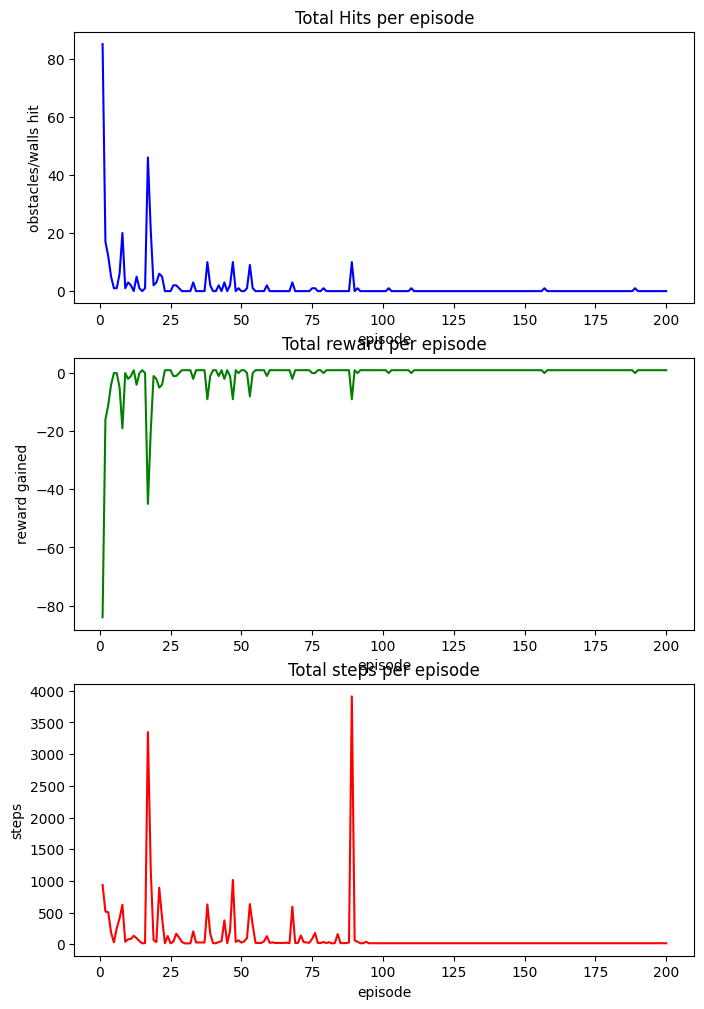

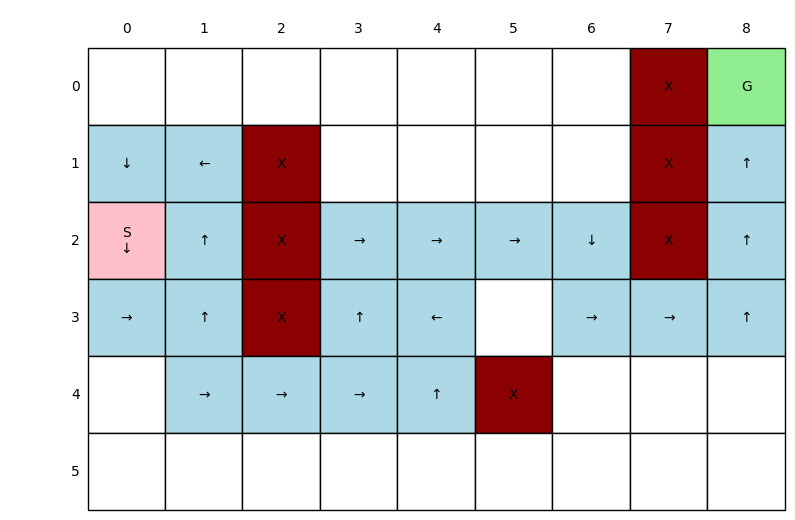

In [ ]:
np.random.seed(42)
FISH = Maze()
robot = SARSA_Agent(FISH)
total_hits, total_rewards, total_steps = robot.sarsa_train()
clear_output(wait=True)
print(f'total obstacle/wall hits of 200th episode: {total_hits}')
print(f'total reward of 200th episode: {total_rewards}')
print(f'total steps of 200th episode: {total_steps}')
robot.draw_policy_table()

# <p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=5>
 Q learning بخش 4: یافتن سیاست بهینه به روش
</font>
</p>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در این کلاس، یک عامل برای یافتن سیاست بهینه به روش <code>QLearning</code>  تعریف شده است. که در طی 200 اپیزود و با پارامترهای مشخص شده در صورت سوال، به عامل روش رسیدن از نقطه شروع به هدف را آموزش می دهد.
</font>
</p>
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
<code>Maze</code>: این پارامتر یک کپی از کلاس Maze است که محیط و متدهای آن را برای عامل تعریف میکند.
</font>
</p>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
<code>grid</code>: این پارامتر یک کپی از جدول بازی (Maze.grid) دارد.
</font>
</p>
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
<code>actions</code>: این پارامتر یک لیست از تمام اکشن های قابل انجام در یک گام زمانی است:<code>['up', 'down', 'left', 'right']</code>
</font>
</p>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
<code>action_value_function</code>:این متغیر برای ذخیره سازی تابع ارزش حالت عمل تعریف شده است.
</font>
</p>


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
علاوه بر متغیر های معرفی شده، برای پیاده سازی الگوریتم Q-learning، توابع زیر تعریف شده اند:
</font>
</p>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
<code>Sarsa_train()</code>:
برای آموزش عامل با متد Q-learning، ابتدا با استفاده از سیاست شبه حریصانه، یک عمل را انتخاب کرده و پاداش r و حالت بعدی 's را ثبت میکنیم. سپس برای مرحله بعدی به صورت حریصانه عمل را 'a را انتخاب کرده و سپس تابع ارزش حالت عمل را به ازای عمل a و حالت s مطابق الگوریتم Q-Leaning به شکل زیر آپدیت میکنیم. برای مشاهده نتایج آموزش و رسم نمودار، در هر اپیزود تولید شده پارامتر هایی مانند تعداد دفعات برخورد به موانع یا دیواره های محیط، مجموع کل پاداش و همچنین تعداد قدم ها در هر اپیزود ثبت شده و در نهایت پس از 200 اپیزود به صورت نمودار نمایش داده شده اند.
</font>
</p>

$$Q(s,a) ← Q(s,a) + \alpha ⋅ \left( r + \gamma ⋅ Q(s',a') - Q(s,a) \right)$$



<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
برای پیاده سازی الگوریتم انتخاب شبه حریصانه، سه تابع <code>greedy_actions(state)</code>، <code>non_greedy_actions(state)</code> و <code>epsilon_greedy_aciton_chooser(state,epsilon)</code> استفاده شده اند. نحوه عمکرد این توابع به صورت زیر است:
</font>
</p>



<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
<code>greedy_actions</code>:
این تابع با گرفتن یک استیت به عنوان ورودی و دسترسی داشتن به تابع ارزش حالت-عمل برای کل صفحه، لیستی از اندیس های عمل(هایی) با بیشترین مقدار ارزش حالت-عمل را بر میگرداند.
</font>
</p>



<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
<code>non_greedy_actions(state)</code>:
این تابع نیز مشابه تابع قبل است با این تفاوت که لیستی از اندیس های همه عمل هایی را بر میگرداند که تابع ارزش حالت-عملشان ماکسیمم نیست. نکته ای که وجود دارد این است که ممکن است مقدار همه ارزش حالت-عمل ها یکسان باشد ( مثلا در مرحله اول که 0 است) در آن صورت این تابع یک لیست خالی را بر میگرداند.
</font>
</p>



<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
<code>epsilon_greedy_action_chooser(state,epsilon)</code>:
این تابع با استفاده از سیاست انتخاب عمل اپسیلون گریدی و با گرفتن ورودی اپسیلون و استیت محیط یک عمل را انتخاب میکند. نحوه انتخاب عمل در این تابع به این صورت است که اگر مقدار عدد رندوم تولید شده کمتر از 1 بیشتر از اپسیلون باشد، سیاست به صورت گریدی ( یا در صورت وجود چند عمل گریدی یکی از آنها به صورت رندوم) انتخاب می شود. در غیر این صورت اگر آن عدد رندوم کوچکتر از اپسیلون باشد، یکی از عمل های غیرحریصانه به انتخاب می شود. ولی یک حالتی که ممکن است ایجاد مشکل کند این است که عدد رندوم کوچکتر از اپسیلون باشد ولی هیچ سیاست غیر بهینه ای وجود نداشته باشد. برای حل این مشکل یک شرط گذاشته شده که در صورتی که تعداد عمل های غیر حریصانه صفر باشد، انتخاب عمل باز هم به صورت حریصانه انجام شود.  
</font>
</p>







<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
<code>draw_policy_table()</code>:
این تابع نیز صفحه بازی و مسیر طی شده توسط عامل در اپیزود آخر را رسم می کند.
</font>
</p>








## <p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=5>
تحلیل نتایج این قسمت و نکات مهم:
</font>
</p>


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
1- اولین نکته مهم نحوه آپدیت شدن اپسیلون در این روش است. در این تابع، با همان روش کوچک کردن اپسیلون به میزان 1 درصد در هر اپیزود سیاست همگرا شد و نیازی به تغییر روش کوچک شدن اپسیلون نیست.
  $$ ϵ= 0.99 ⋅ ϵ$$
</font>
</p>



<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
2- همانطور که در خروجی سیستم مشاهده می شود، تعداد قدم های عامل برای رسیدن به هدف پس از یک پیک به سمت بالا به سرعت کم شده و به صفر میرسد. همین موضوع در تعداد دفعات برخورد عامل به موانع نیز مشاهده می شود.
</font>
</p>





## <p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=5>
 Q-learning و SARSA مقایسه الگوریتم
</font>
</p>


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
همانطور که درتعداد قدم ها و مسیر طی شده مشخص است، الگوریتم Q-learningسریعتر به جواب رسیده است و تعداد قدم هایی که برداشته است کمتر است. در مقابل الگوریتم SARSA با تعداد قدم های بیشتری به هدف رسیده است.
</font>
</p>




In [ ]:
class QLearning_Agent():
  def __init__(self, Maze):

    self.Maze = Maze
    self.grid = Maze.grid
    self.alpha = 0.9
    self.epsilon = 0.1
    self.discount_factor = 0.9
    self.episode_count = 200
    self.actions = ['up', 'down', 'left', 'right']
    self.action_value_function = np.zeros((self.grid.shape[0],self.grid.shape[1], 4))
    self.decay_rate = 0.01

  def greedy_actions(self,state):
    j,i = state
    q_values = self.action_value_function[j,i,:]
    max_value = np.max(q_values)
    best_action_ids = np.where(q_values == max_value)[0]
    return best_action_ids

  def non_greedy_actions(self,state):
    j,i = state
    q_values = self.action_value_function[j,i,:]
    max_value = np.max(q_values)
    bad_action_ids = np.array([idx for idx , q in enumerate(q_values) if (q!= max_value )])
    return bad_action_ids

  def epsilon_greedy_action_chooser(self,state,epsilon): #step_number, total_steps):
    random = np.random.uniform(low = 0.0, high= 1.0)
    if random <=epsilon:
      bad_action_ids = self.non_greedy_actions(state)
      if bad_action_ids.size>0:
          action_idx = np.random.choice(bad_action_ids)
      else:
          action_idx = np.random.choice(self.greedy_actions(state))
      # action_idx = np.random.choice([0,1,2,3])
    else:
      action_idx = np.random.choice(self.greedy_actions(state))
    return action_idx

  def Q_learning_train(self):
    obstacle_hit_count = np.zeros(self.episode_count)
    total_reward = np.zeros(self.episode_count)
    episode_step_number= np.zeros(self.episode_count)

    for episode_id in range(self.episode_count):
      clear_output(wait=True)
      print(f"generating episode {episode_id+1} of {self.episode_count} ")
      print(f"epsilon = {self.epsilon}")
      current_state = self.Maze.start_state


      while(not self.Maze.is_goal(current_state)):
        action_id = self.epsilon_greedy_action_chooser(current_state, self.epsilon)
        action = self.actions[action_id]
        next_state , reward = self.Maze.get_next_state(current_state , action)

        # check if we hit obstacle/wall (got reward of -1)
        if reward == -1:
          obstacle_hit_count[episode_id] += 1
        total_reward[episode_id] += reward
        next_action_id = np.random.choice(self.greedy_actions(current_state)) #use greedy choice for next state
        # next_action = self.actions[next_action_id]
        j,i = current_state
        next_j, next_i = next_state

        Q = self.action_value_function[j,i,action_id] #Q(s,a)
        Q_prime = np.max(self.action_value_function[next_j, next_i, :]) #self.action_value_function[next_j, next_i,next_action_id] # max{Q(s',a')|a'}
        Q = Q + self.alpha * (reward + self.discount_factor * Q_prime - Q) # Q(s,a) = Q(s,a) + alpha*(r + gamma*Q(s',a') - Q(s,a))
        self.action_value_function[j,i,action_id] = Q


        current_state = next_state
        episode_step_number[episode_id] += 1


      self.epsilon= self.epsilon *0.99 #self.decay_rate ** (episode_id / self.episode_count)#max( , 0.0001)

    fig, ax = plt.subplots(3, 1, figsize=(8, 12))
    indices = np.arange(1,self.episode_count+1)
    ax[0].plot(indices,obstacle_hit_count, linestyle='-', color='b')
    ax[0].set_title('Total Hits per episode')
    ax[0].set_xlabel('episode')
    ax[0].set_ylabel('obstacles/walls hit')

    ax[1].plot(indices,total_reward, linestyle='-', color='g')
    ax[1].set_title('Total reward per episode')
    ax[1].set_xlabel('episode')
    ax[1].set_ylabel('reward gained')

    ax[2].plot(indices,episode_step_number, linestyle='-', color='r')
    ax[2].set_title('Total steps per episode')
    ax[2].set_xlabel('episode')
    ax[2].set_ylabel('steps')


    return obstacle_hit_count[-1], total_reward[-1], episode_step_number[-1]


  def draw_policy_table(self):

      current_state = self.Maze.start_state
      final_episode = [];
      while( not self.Maze.is_goal(current_state)):
        action_id = self.epsilon_greedy_action_chooser(current_state, self.epsilon)
        action = self.actions[action_id]
        next_state , _ = self.Maze.get_next_state(current_state , action)
        final_episode.append((current_state, action))
        current_state = next_state

      action_symbols = {'up': '↑', 'down': '↓', 'left': '←', 'right': '→'}
      fig, ax = plt.subplots(figsize=(9, 6))
      ax.axis('off')
      table = tbl.Table(ax, bbox=[0, 0, 1, 1])
      nrows, ncols = self.grid.shape[0], self.grid.shape[1]
      width, height = 1/ ncols, 1 / nrows

      episode_states, actions = zip(*final_episode)

      for j in range(nrows):
          for i in range(ncols):
              state = (j, i)
              cell_text = ""
              cell_color = "white"

              if state in episode_states:
                  action_idx = episode_states.index(state)
                  action = actions[action_idx]
                  if state == (self.Maze.start_state):  # Start state
                      cell_text = f"S\n{action_symbols[action]}"
                      cell_color = "pink"
                  else:
                      cell_text = action_symbols[action]
                      cell_color = "lightblue"

              elif self.grid[j, i] == "X":
                  cell_text = "X"
                  cell_color = "darkred"

              elif self.grid[j, i] == "G":
                  cell_text = "G"
                  cell_color = "lightgreen"

              table.add_cell(j, i, width, height, text=cell_text, loc="center", facecolor=cell_color)

      for j in range(nrows):
          table.add_cell(j, -1, width, height, text=j, loc="right", edgecolor="none", facecolor="none")
      for i in range(ncols):
          table.add_cell(-1, i, width, height / 2, text=i, loc="center", edgecolor="none", facecolor="none")

      ax.add_table(table)
      plt.show()






generating episode 200 of 200 
epsilon = 0.013533300490703223
1.0
0.0
15.0


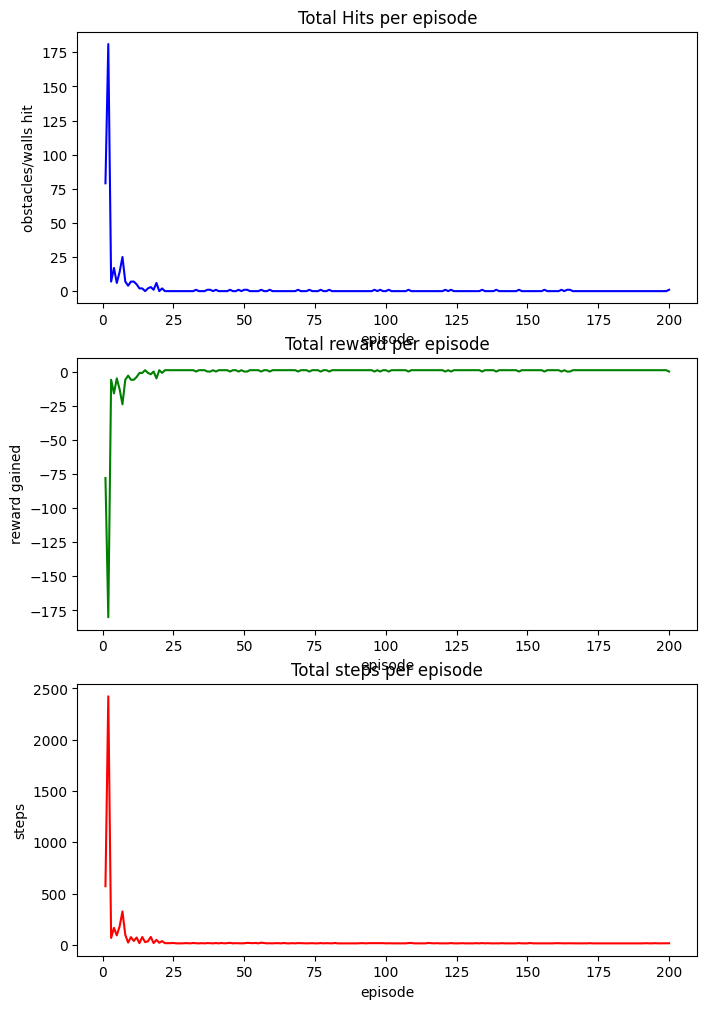

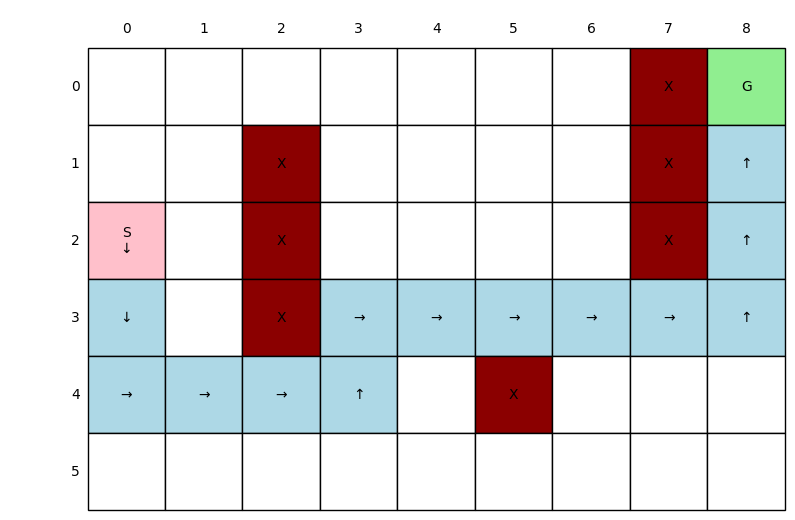

In [ ]:
np.random.seed(42)
FISH = Maze()
robot = QLearning_Agent(FISH)
total_hits, total_rewards, total_steps = robot.Q_learning_train()
print(total_hits)
print(total_rewards)
print(total_steps)
robot.draw_policy_table()

## <p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=5>
نکات پایانی:</font>
</p>


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
می توان الگوریتم انتخاب شبه حریصانه رابه صورت دیگری نیز نوشت: اگر عدد رندوم کوچکتر از اپسیلون بود، از بین همه عمل ها یکی به صورت رندوم انتخاب شود و اگر از اپسیلون بیشتر است، از بین عمل های حریصانه یکی به صورت رندوم انتخاب شود.
</font>
</p>


